In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# Load CSV file into a DataFrame
df: pd.DataFrame = pd.read_csv("csv/AllSubjects.csv")

# Select columns starting with 'Pside' and include 'subject'
pside_cols: list = [col for col in df.columns if col.startswith("Pside")]
pside_cols.insert(0, "subject")

# Keep only the selected columns
df = df[pside_cols]

# Rename 'subject' column to 'Subject' for consistency
df.rename(columns={"subject": "Subject"}, inplace=True)

# Sort rows by 'Subject'
df.sort_values("Subject", inplace=True)

# Display first 5 rows
df.head()


,Subject,Pside_AnkleAngles,Pside_KneeAngles,Pside_HipAngles,Pside_PelvisAngles,Pside_GASnorm,Pside_RFnorm,Pside_VLnorm,Pside_BFnorm,Pside_STnorm,Pside_TAnorm,Pside_ERSnorm
37286,Sub01,12.785372,14.768345,8.673370,4.616966,0.454807,0.301307,0.311426,0.315061,0.420217,0.251869,0.333873
37379,Sub01,12.624925,10.035081,1.484787,2.591114,0.189655,0.394523,0.396546,0.172809,0.181387,0.229172,0.237732
37378,Sub01,12.635949,10.088955,1.570776,2.624180,0.191162,0.392752,0.400141,0.173655,0.186463,0.233224,0.240224
37377,Sub01,12.646790,10.142752,1.656558,2.656997,0.194030,0.393492,0.404380,0.174646,0.190570,0.239128,0.242329
37376,Sub01,12.657490,10.196449,1.742116,2.689559,0.199528,0.396003,0.408493,0.177604,0.192507,0.245369,0.242587


<h1><b>Angle Columns</b></h1>

In [ ]:
# Select all columns whose names end with 'Angles'
angle_columns: list[str] = [i for i in df.columns if i.endswith("Angles")]

# Display the selected columns
angle_columns

['Pside_AnkleAngles',
 'Pside_KneeAngles',
 'Pside_HipAngles',
 'Pside_PelvisAngles']

<h1><b>Normalized EMG Columns</b></h1>

In [ ]:
# Select all columns whose names end with 'norm'
emg_columns: list[str] = [i for i in df.columns if i.endswith("norm")]

# Display the selected columns
emg_columns


['Pside_GASnorm',
 'Pside_RFnorm',
 'Pside_VLnorm',
 'Pside_BFnorm',
 'Pside_STnorm',
 'Pside_TAnorm',
 'Pside_ERSnorm']

<h1><b>The Angle Dataset</b></h1>

In [ ]:
# Create a DataFrame with only the angle columns
angle_df: pd.DataFrame = df[angle_columns]

# Display the first 5 rows
angle_df.head()


,Pside_AnkleAngles,Pside_KneeAngles,Pside_HipAngles,Pside_PelvisAngles
37286,12.785372,14.768345,8.673370,4.616966
37379,12.624925,10.035081,1.484787,2.591114
37378,12.635949,10.088955,1.570776,2.624180
37377,12.646790,10.142752,1.656558,2.656997
37376,12.657490,10.196449,1.742116,2.689559


<h1><b>Mean, Median and Standard Deviation of Joint Angles</b></h1>

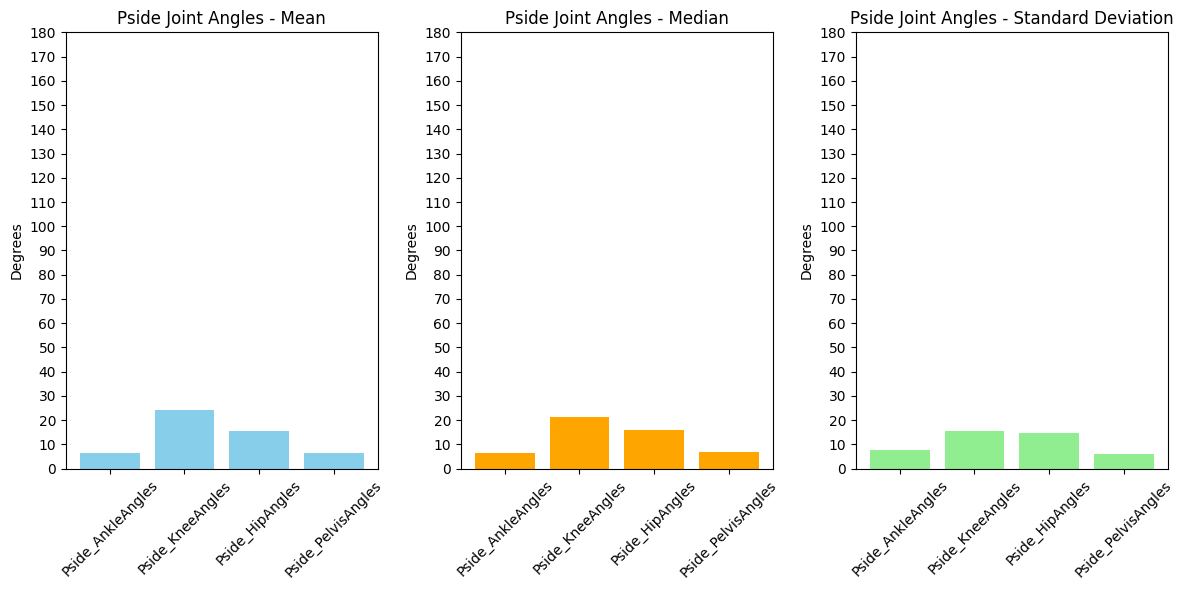

In [ ]:
# Compute basic statistics for the angle columns
mean: pd.Series = angle_df.mean()
std: pd.Series = angle_df.std()
median: pd.Series = angle_df.median()

# Create a figure with 3 subplots for Mean, Median, and Standard Deviation
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Plot Mean
axs[0].bar(mean.index, mean.values, color="skyblue")
axs[0].set_title("Pside Joint Angles - Mean")
axs[0].tick_params(axis="x", rotation=45)

# Plot Median
axs[1].bar(median.index, median.values, color="orange")
axs[1].set_title("Pside Joint Angles - Median")
axs[1].tick_params(axis="x", rotation=45)

# Plot Standard Deviation
axs[2].bar(std.index, std.values, color="lightgreen")
axs[2].set_title("Pside Joint Angles - Standard Deviation")
axs[2].tick_params(axis="x", rotation=45)

# Set y-axis ticks and label for all subplots
ticks = np.arange(0, 181, 10)
for ax in axs:
    ax.set_yticks(ticks)
    ax.set_ylabel("Degrees")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


<h1><b>The Normalized EMG Dataset</b></h1>

In [ ]:
# Create a DataFrame with only the EMG columns
emg_df: pd.DataFrame = df[emg_columns]

# Display the first 5 rows
emg_df.head()


,Pside_GASnorm,Pside_RFnorm,Pside_VLnorm,Pside_BFnorm,Pside_STnorm,Pside_TAnorm,Pside_ERSnorm
37286,0.454807,0.301307,0.311426,0.315061,0.420217,0.251869,0.333873
37379,0.189655,0.394523,0.396546,0.172809,0.181387,0.229172,0.237732
37378,0.191162,0.392752,0.400141,0.173655,0.186463,0.233224,0.240224
37377,0.194030,0.393492,0.404380,0.174646,0.190570,0.239128,0.242329
37376,0.199528,0.396003,0.408493,0.177604,0.192507,0.245369,0.242587


<h1><b>Mean, Median and Standard Deviation of Normalized EMG Data</b></h1>

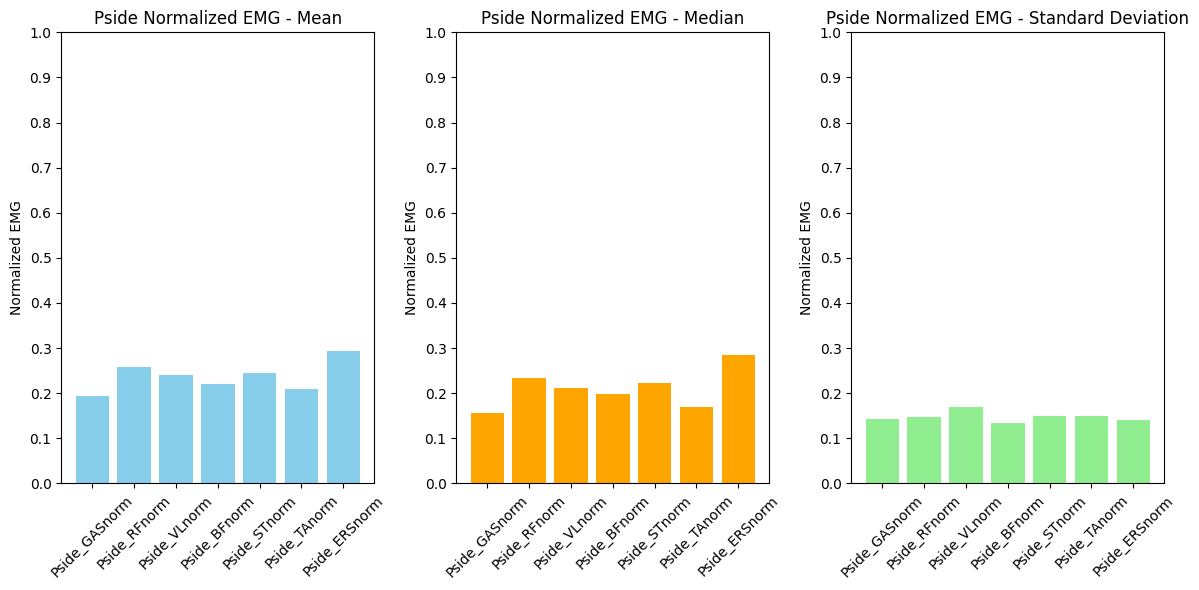

In [ ]:
# Compute basic statistics for the EMG columns
mean: pd.Series = emg_df.mean()
std: pd.Series = emg_df.std()
median: pd.Series = emg_df.median()

# Create a figure with 3 subplots for Mean, Median, and Standard Deviation
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Plot Mean
axs[0].bar(mean.index, mean.values, color="skyblue")
axs[0].set_title("Pside Normalized EMG - Mean")
axs[0].tick_params(axis="x", rotation=45)

# Plot Median
axs[1].bar(median.index, median.values, color="orange")
axs[1].set_title("Pside Normalized EMG - Median")
axs[1].tick_params(axis="x", rotation=45)

# Plot Standard Deviation
axs[2].bar(std.index, std.values, color="lightgreen")
axs[2].set_title("Pside Normalized EMG - Standard Deviation")
axs[2].tick_params(axis="x", rotation=45)

# Set y-axis ticks and label for all subplots
ticks = np.arange(0, 1.1, 0.1)
for ax in axs:
    ax.set_yticks(ticks)
    ax.set_ylabel("Normalized EMG")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


<h1><b>Minimum and Maximum Value of Joint Angles and Normalized EMG Data</b></h1>

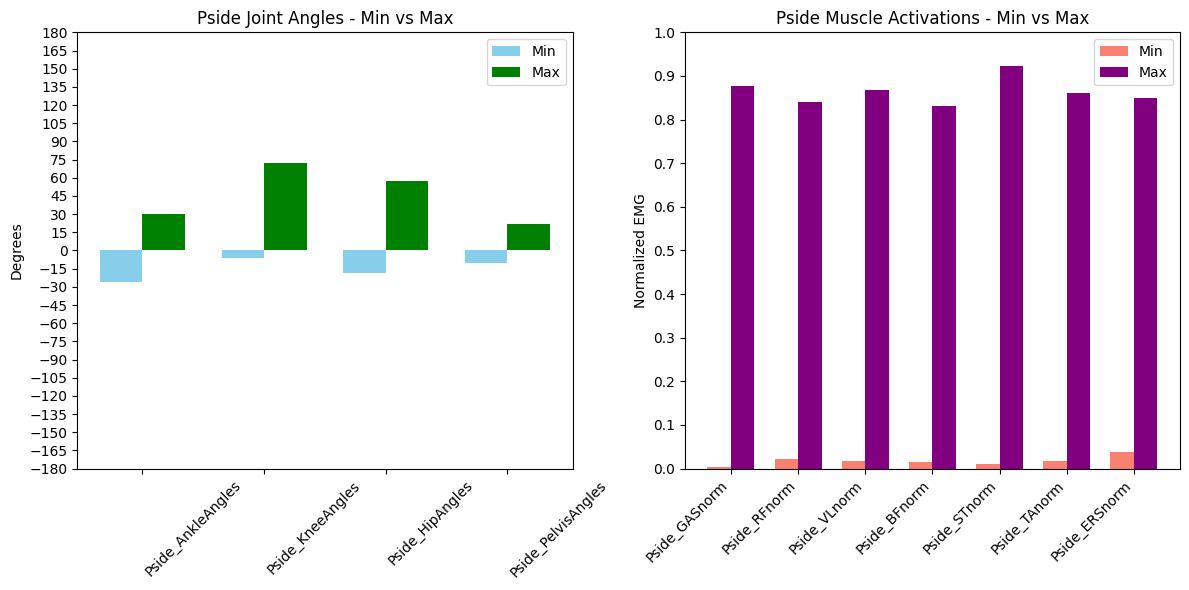

In [ ]:
# Compute min and max values for angles and EMG columns
angle_min: pd.Series = angle_df.min()
angle_max: pd.Series = angle_df.max()
emg_min: pd.Series = emg_df.min()
emg_max: pd.Series = emg_df.max()

# Setup for plotting
angle_names: list[str] = angle_min.index.tolist()
emg_names: list[str] = emg_min.index.tolist()
x_angle: np.ndarray = np.arange(len(angle_names))
x_emg: np.ndarray = np.arange(len(emg_names))
bar_width: float = 0.35

# Create subplots: one for angles, one for EMG
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot min vs max for angles
axs[0].bar(x_angle - bar_width / 2, angle_min.values, bar_width, label="Min", color="skyblue")
axs[0].bar(x_angle + bar_width / 2, angle_max.values, bar_width, label="Max", color="green")
axs[0].set_title("Pside Joint Angles - Min vs Max")
axs[0].set_ylabel("Degrees")
axs[0].set_xticks(x_angle)
axs[0].set_xticklabels(angle_names, rotation=45, ha="left")
axs[0].legend()
axs[0].set_yticks(np.arange(-180, 181, 15))

# Plot min vs max for EMG
axs[1].bar(x_emg - bar_width / 2, emg_min.values, bar_width, label="Min", color="salmon")
axs[1].bar(x_emg + bar_width / 2, emg_max.values, bar_width, label="Max", color="purple")
axs[1].set_title("Pside Muscle Activations - Min vs Max")
axs[1].set_ylabel("Normalized EMG")
axs[1].set_xticks(x_emg)
axs[1].set_xticklabels(emg_names, rotation=45, ha="right")
axs[1].legend()
axs[1].set_yticks(np.arange(0, 1.1, 0.1))

# Adjust layout and display plots
plt.tight_layout()
plt.show()


<h1><b>EMG Data of Muscles in Ascending Order</b></h1>

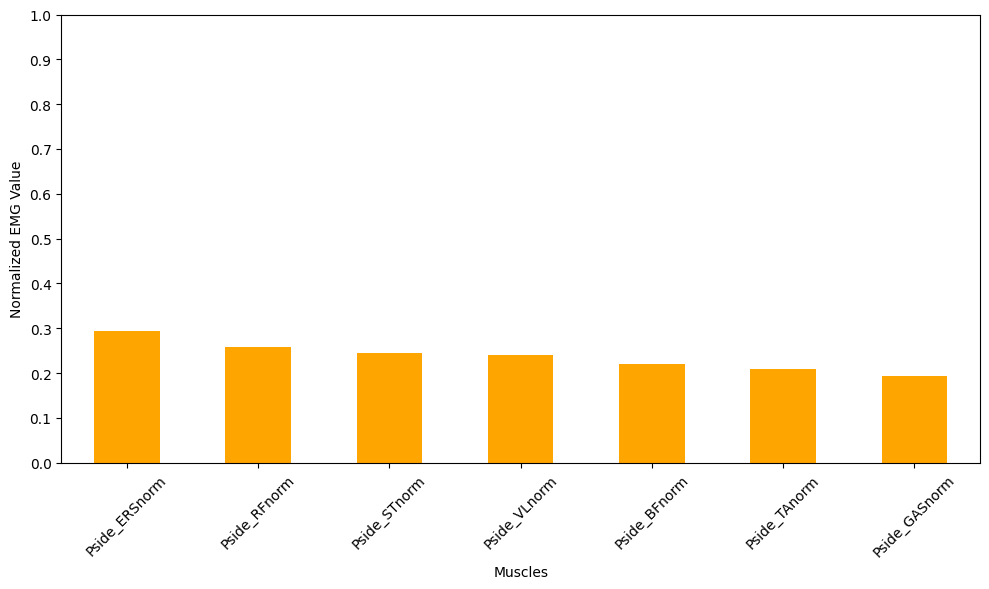

In [ ]:
# Compute mean EMG values and sort descending
mean: pd.Series = emg_df.mean().sort_values(ascending=False)

# Plot mean EMG values as a bar chart
plt.figure(figsize=(10, 6))
mean.plot(kind="bar", color="orange")

plt.xlabel("Muscles")
plt.ylabel("Normalized EMG Value")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()
plt.show()


<h1><b>Movement of Joints in Ascending Order</b></h1>

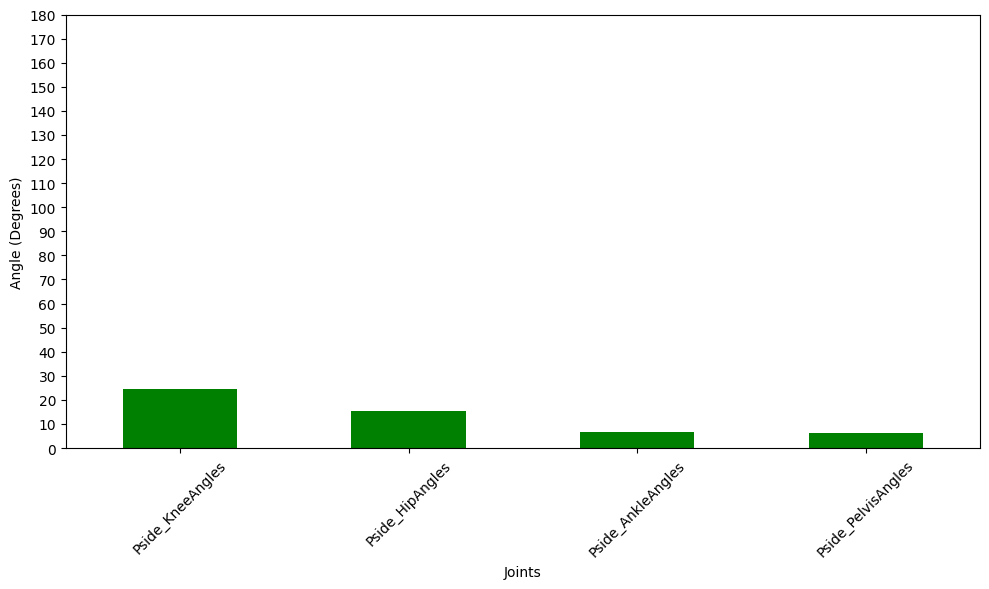

In [ ]:
# Compute mean joint angles and sort descending
mean: pd.Series = angle_df.mean().sort_values(ascending=False)

# Plot mean joint angles as a bar chart
plt.figure(figsize=(10, 6))
mean.plot(kind="bar", color="green")

plt.xlabel("Joints")
plt.ylabel("Angle (Degrees)")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 181, 10))

plt.tight_layout()
plt.show()


<h1><b>Mean +- Standard Deviation for Joint Angles</b></h1>

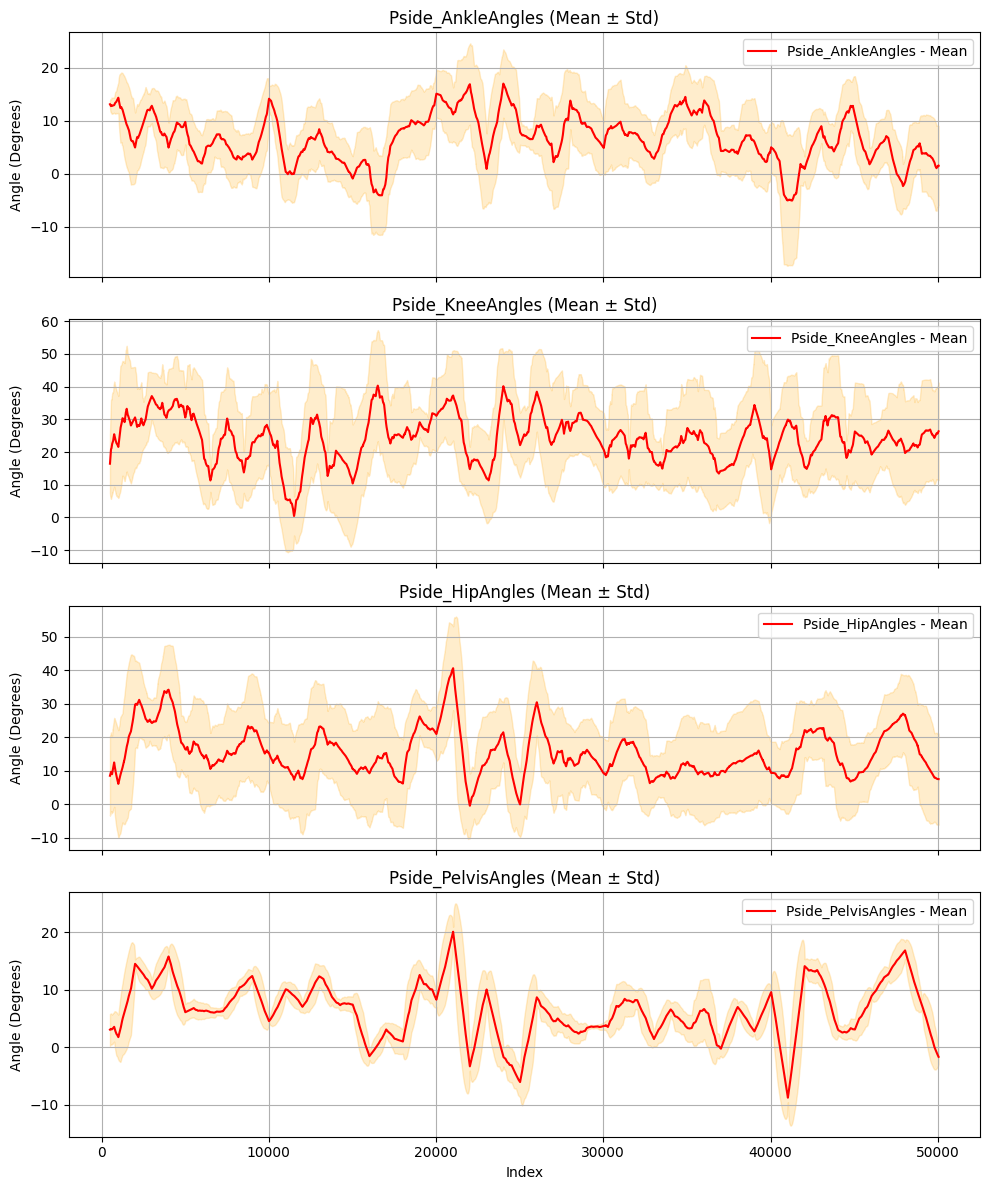

In [ ]:
# Number of joints
num_joints: int = len(angle_columns)

# Create subplots: one row per joint
fig, axs = plt.subplots(num_joints, 1, figsize=(10, 3 * num_joints), sharex=True)

# Plot rolling mean ± std for each joint
for i, joint in enumerate(angle_columns):
    signal: pd.Series = angle_df[joint]
    x = np.arange(len(signal))

    mean = signal.rolling(1000, min_periods=500).mean()
    std = signal.rolling(1000, min_periods=500).std()

    axs[i].plot(x, mean, label=f"{joint} - Mean", color="red")
    axs[i].fill_between(x, mean - std, mean + std, alpha=0.2, color="orange")

    axs[i].set_title(f"{joint} (Mean ± Std)")
    axs[i].set_ylabel("Angle (Degrees)")
    axs[i].grid(True)
    axs[i].legend(loc="upper right")

# Set x-axis label for the last subplot
axs[-1].set_xlabel("Index")

plt.tight_layout()
plt.show()


<h1><b>Mean +- Standard Deviation for Normalized EMG</b></h1>

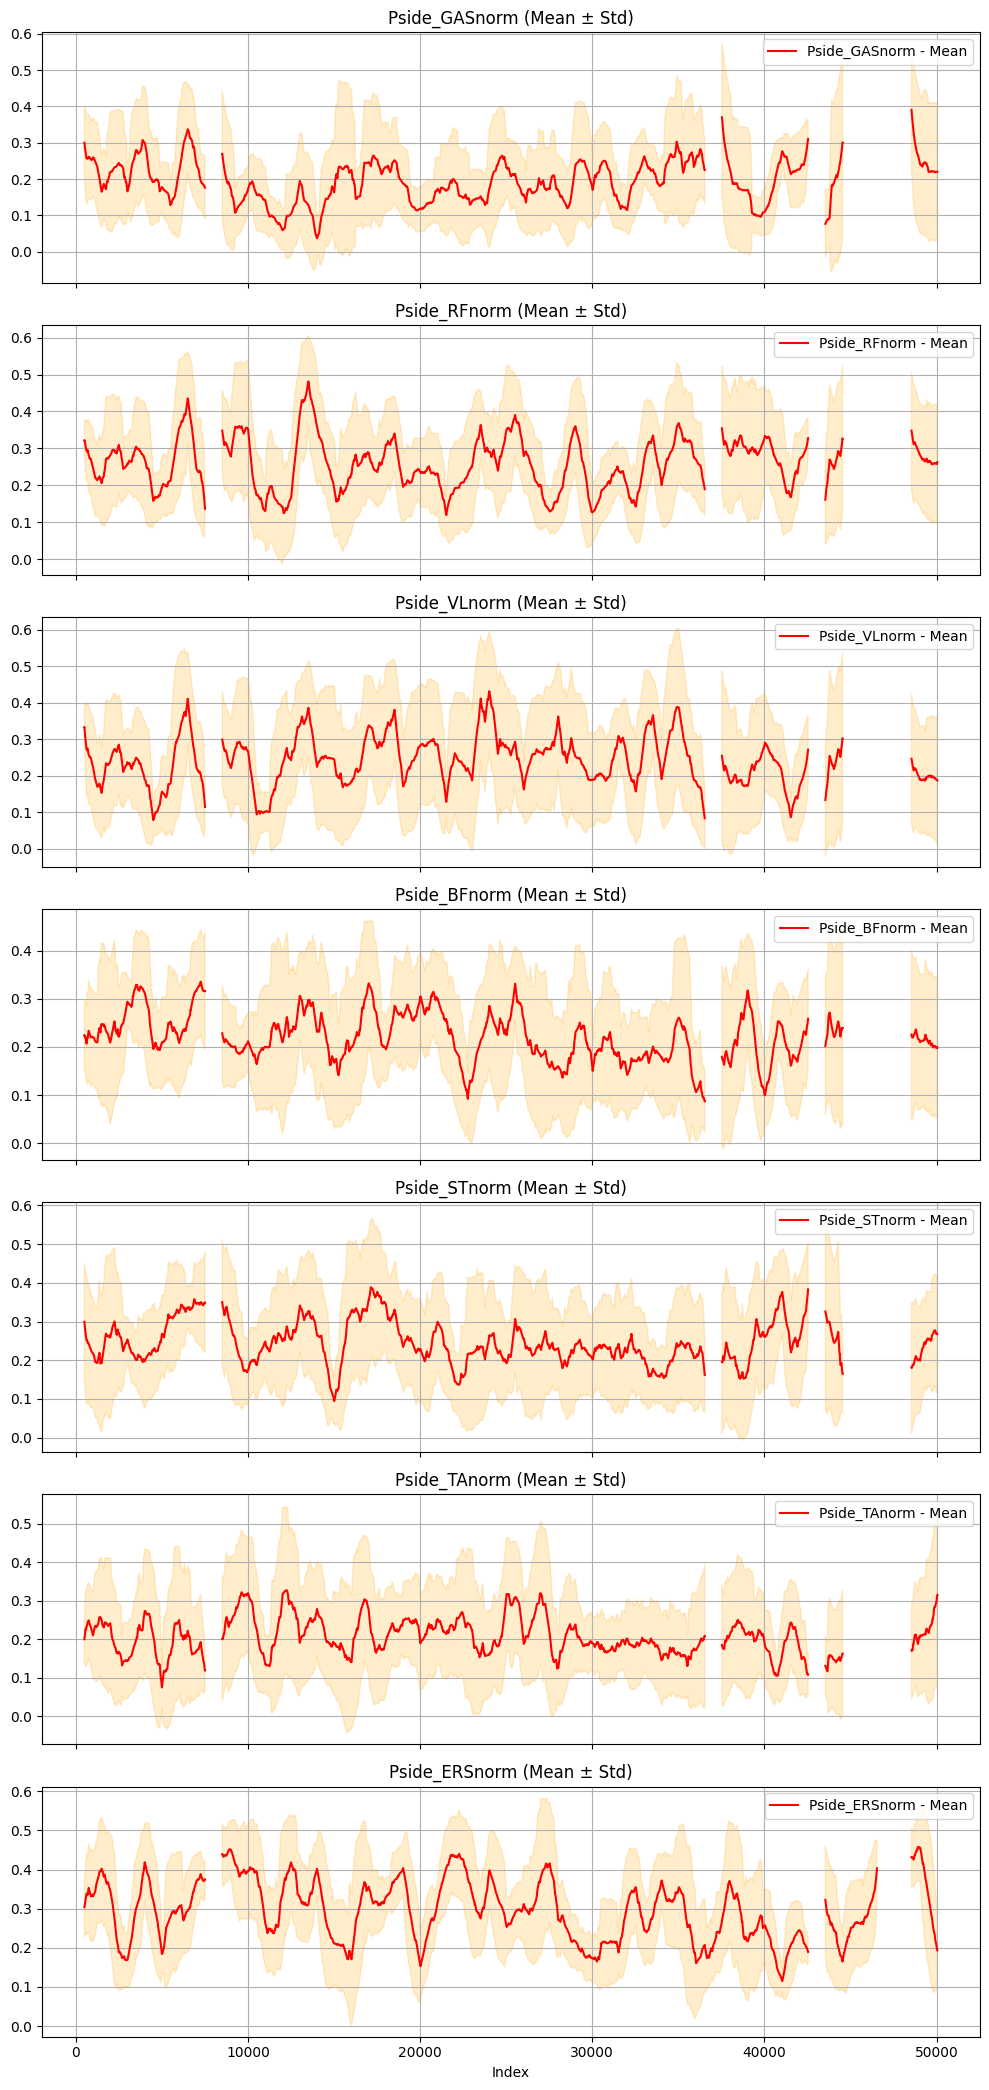

In [ ]:
# Number of EMG signals
num_joints: int = len(emg_columns)

# Create subplots: one row per EMG signal
fig, axs = plt.subplots(num_joints, 1, figsize=(10, 3 * num_joints), sharex=True)

# Plot rolling mean ± std for each EMG signal
for i, joint in enumerate(emg_columns):
    signal: pd.Series = emg_df[joint]
    x = np.arange(len(signal))

    mean = signal.rolling(1000, min_periods=500).mean()
    std = signal.rolling(1000, min_periods=500).std()

    axs[i].plot(x, mean, label=f"{joint} - Mean", color="red")
    axs[i].fill_between(x, mean - std, mean + std, alpha=0.2, color="orange")

    axs[i].set_title(f"{joint} (Mean ± Std)")
    axs[i].set_ylabel("Normalized EMG")
    axs[i].grid(True)
    axs[i].legend(loc="upper right")

# Set x-axis label for the last subplot
axs[-1].set_xlabel("Index")

plt.tight_layout()
plt.show()


<h1><b>FAC — Functional Ambulation Categories</b></h1>
<a href="https://strokengine.ca/en/assessments/fac/#:~:text=cm%20per%20second.-,Categories%20(FAC)%20is%20a%20functional%20walking%20test%20that%20evaluates%20ambulation,et%20al.%2C%202011).">Reference</a>
<h2>Purpose:</h2>
<p>Assesses how independently a person can walk.</p>

<h2>Used in:</h2>
<p>Stroke rehab, neurological disorders, elderly mobility assessments.</p>

<h2>Scale Range:</h2>
<p>0 to 5</p>

<h2>Scoring:</h2>
<ul>
  <li><b>0:</b> Non-functional ambulation (can't walk or requires help from two people)</li>
  <li><b>1:</b> Needs continuous physical assistance</li>
  <li><b>2:</b> Needs intermittent assistance or supervision</li>
  <li><b>3:</b> Verbal supervision only</li>
  <li><b>4:</b> Independent on level surfaces</li>
  <li><b>5:</b> Fully independent (including stairs and uneven surfaces)</li>
</ul>


<h1><b>Tinetti POMA — Performance-Oriented Mobility Assessment</b></h1>

<a href="https://www.ncbi.nlm.nih.gov/books/NBK578181/#article-132844.table1">Reference</a>
<a href="https://www.ncbi.nlm.nih.gov/books/NBK578181/table/article-132844.table1/?report=objectonly">Table</a>

<h2>Purpose:</h2>
<p>Assesses gait and balance to predict fall risk, especially in the elderly.</p>

<h2>Subscales:</h2>
<ul>
  <li><b>Balance:</b> Max 16 points</li>
  <li><b>Gait:</b> Max 12 points</li>
  <li><b>Total Score:</b> 0 to 28</li>
</ul>

<h2>Interpretation:</h2>
<ul>
  <li><b>≤18:</b> High fall risk</li>
  <li><b>19–23:</b> Moderate fall risk</li>
  <li><b>24–28:</b> Low fall risk</li>
</ul>


<h1><b>TIS — Trunk Impairment Scale</b></h1>
<a href="https://www.researchgate.net/profile/Alice-Nieuwboer/publication/8567541_The_Trunk_Impairment_Scale_A_new_tool_to_measure_motor_impairment_of_the_trunk_after_stroke/links/0046352c59193ada5d000000/The-Trunk-Impairment-Scale-A-new-tool-to-measure-motor-impairment-of-the-trunk-after-stroke.pdf">Reference</a>
<h2>Purpose:</h2>
<p>Measures trunk control in people with stroke or other neurological conditions.</p>

<h2>Focuses on:</h2>
<p>Static sitting balance, dynamic sitting balance, trunk coordination.</p>

<h2>Scale Range:</h2>
<ul>
  <li>0 to 23</li>
</ul>

<h2>Scoring:</h2>
<ul>
  <li><b>Higher score =</b> Better trunk function</li>
  <li><b>0:</b> No control</li>
  <li><b>23:</b> Normal trunk control</li>
</ul>


In [17]:
TINETTI_POMA = [
    23,27,14,21,15,26,
    21,21,19,18,12,26,
    11,20,17,28,13,19,
    16,21,24,15,21,17,
    7,18,20,14,23,12,10,
    21,8,13,23,8,13,27,28,
    28,6,15,22,28,21,12,20,24,25,26
]

TINETTI_POMA_MAPPING = {
    f"Sub{str(i+1).zfill(2)}": TINETTI_POMA[i] for i in range(50)
}

print(TINETTI_POMA_MAPPING)

{'Sub01': 23, 'Sub02': 27, 'Sub03': 14, 'Sub04': 21, 'Sub05': 15, 'Sub06': 26, 'Sub07': 21, 'Sub08': 21, 'Sub09': 19, 'Sub10': 18, 'Sub11': 12, 'Sub12': 26, 'Sub13': 11, 'Sub14': 20, 'Sub15': 17, 'Sub16': 28, 'Sub17': 13, 'Sub18': 19, 'Sub19': 16, 'Sub20': 21, 'Sub21': 24, 'Sub22': 15, 'Sub23': 21, 'Sub24': 17, 'Sub25': 7, 'Sub26': 18, 'Sub27': 20, 'Sub28': 14, 'Sub29': 23, 'Sub30': 12, 'Sub31': 10, 'Sub32': 21, 'Sub33': 8, 'Sub34': 13, 'Sub35': 23, 'Sub36': 8, 'Sub37': 13, 'Sub38': 27, 'Sub39': 28, 'Sub40': 28, 'Sub41': 6, 'Sub42': 15, 'Sub43': 22, 'Sub44': 28, 'Sub45': 21, 'Sub46': 12, 'Sub47': 20, 'Sub48': 24, 'Sub49': 25, 'Sub50': 26}


In [18]:
df = pd.read_csv("csv/AllSubjects.csv")

# Extract feature columns
pside_cols = [col for col in df.columns if col.startswith("Pside")]
nside_cols = [col for col in df.columns if col.startswith("Nside")]
feature_cols = pside_cols + nside_cols  # should be 22

# Normalize subject column
df.rename(columns={"subject": "Subject"}, inplace=True)
df.sort_values(by="Subject", inplace=True)

print("Any NaNs in entire DataFrame?", df.isna().values.any())


subjects = df["Subject"].unique()
n_subjects = len(subjects)
n_samples = 1001
n_features = len(feature_cols)

# --- STEP 4: Allocate Arrays ---
data = np.zeros((n_subjects, n_samples, n_features))
labels = np.zeros((n_subjects, 1))

# --- STEP 5: Fill Data and Labels ---
for i, subject in enumerate(subjects):
    subject_df = df[df["Subject"] == subject][feature_cols]

    if subject_df.shape[0] < n_samples:
        raise ValueError(f"{subject} has only {subject_df.shape[0]} samples (needs 1001)")

    subject_data = subject_df[:n_samples].to_numpy()

    # Handle NaNs if any
    if np.isnan(subject_data).any():
        print(f"⚠️ NaNs found in {subject}, filling with 0.")
        subject_data = np.nan_to_num(subject_data)

    data[i] = subject_data
    labels[i] = TINETTI_POMA_MAPPING[subject]

# --- STEP 6: Save to .npz ---
np.savez("data.npz", data=data, labels=labels)

# --- STEP 7: Final Confirmation ---
print("✅ Saved to data.npz")
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)
print("Any NaNs in data?", np.isnan(data).any())
print("Any NaNs in labels?", np.isnan(labels).any())


Any NaNs in entire DataFrame? True
⚠️ NaNs found in Sub08, filling with 0.
⚠️ NaNs found in Sub37, filling with 0.
⚠️ NaNs found in Sub43, filling with 0.
⚠️ NaNs found in Sub45, filling with 0.
⚠️ NaNs found in Sub46, filling with 0.
⚠️ NaNs found in Sub47, filling with 0.
⚠️ NaNs found in Sub48, filling with 0.
✅ Saved to data.npz
Data shape: (50, 1001, 22)
Labels shape: (50, 1)
Any NaNs in data? False
Any NaNs in labels? False


In [19]:
loaded = np.load("data.npz")

# Extract arrays
data = loaded["data"]
labels = loaded["labels"]

# Check shapes
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (50, 1001, 22)
Labels shape: (50, 1)


In [20]:
def get_subject_index_by_id(id_: str) -> int:
    subjects = df["Subject"].unique()
    if id_ not in subjects:
        raise ValueError(f"Subject ID {id_} not found.")
    return list(subjects).index(id_)

Epoch 1/40 - Loss: 624.1927
Epoch 2/40 - Loss: 226.3754
Epoch 3/40 - Loss: 134.8450
Epoch 4/40 - Loss: 167.3016
Epoch 5/40 - Loss: 106.9182
Epoch 6/40 - Loss: 110.4095
Epoch 7/40 - Loss: 77.8318
Epoch 8/40 - Loss: 51.6759
Epoch 9/40 - Loss: 41.7029
Epoch 10/40 - Loss: 32.2804
Epoch 11/40 - Loss: 28.0858
Epoch 12/40 - Loss: 25.4827
Epoch 13/40 - Loss: 22.1370
Epoch 14/40 - Loss: 19.1397
Epoch 15/40 - Loss: 20.9103
Epoch 16/40 - Loss: 18.1770
Epoch 17/40 - Loss: 18.1643
Epoch 18/40 - Loss: 21.3080
Epoch 19/40 - Loss: 16.9163
Epoch 20/40 - Loss: 18.0426
Epoch 21/40 - Loss: 20.6022
Epoch 22/40 - Loss: 14.3649
Epoch 23/40 - Loss: 11.7864
Epoch 24/40 - Loss: 7.3032
Epoch 25/40 - Loss: 10.9615
Epoch 26/40 - Loss: 10.2715
Epoch 27/40 - Loss: 10.6983
Epoch 28/40 - Loss: 12.0043
Epoch 29/40 - Loss: 6.8912
Epoch 30/40 - Loss: 5.0951
Epoch 31/40 - Loss: 4.4644
Epoch 32/40 - Loss: 3.4765
Epoch 33/40 - Loss: 2.4107
Epoch 34/40 - Loss: 1.2354
Epoch 35/40 - Loss: 0.9410
Epoch 36/40 - Loss: 0.8118
Epoc

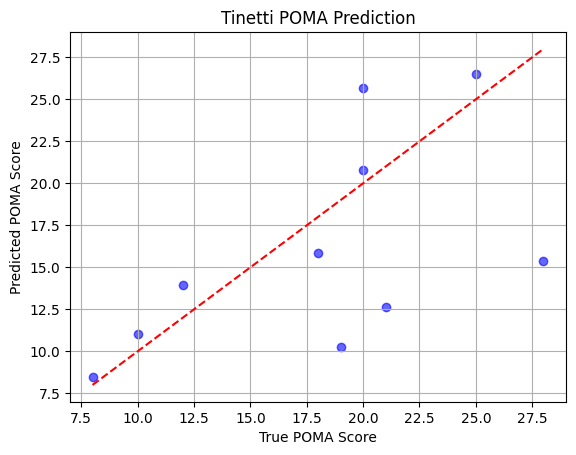

In [21]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- Load and Prepare Data ---
npz = np.load("data.npz")
data = npz["data"]     # shape: (50, 1001, 22)
labels = npz["labels"] # shape: (50, 1)


# Transpose to (N, channels, sequence_length)
data = data.transpose(0, 2, 1)  # (N, 22, 1001)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# --- Dataset ---
class PomaDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = PomaDataset(X_train, y_train)
test_ds = PomaDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=8, shuffle=False)

# --- Model ---
class PomaCNN(nn.Module):
    def __init__(self):
        super(PomaCNN, self).__init__()
        self.conv1 = nn.Conv1d(22, 64, kernel_size=5, padding=2)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=5, padding=2)
        self.pool = nn.AdaptiveAvgPool1d(32)
        self.fc1 = nn.Linear(128 * 32, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# --- Initialize ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PomaCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# --- Train ---
epochs = 40
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        pred = model(xb)
        loss = criterion(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss:.4f}")

# --- Save ---
torch.save(model.state_dict(), f"poma_cnn_model.pt")
print(f"Model saved to poma_cnn_model.pt")

# --- Evaluate ---
model.eval()
preds = []
targets = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        yb = yb.to(device)

        out = model(xb)
        preds.extend(out.cpu().numpy().flatten())
        targets.extend(yb.cpu().numpy().flatten())

# --- Metrics ---
mse = mean_squared_error(targets, preds)
r2 = r2_score(targets, preds)

print(f"Test MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# --- Plot ---
plt.scatter(targets, preds, c='blue', alpha=0.6)
plt.plot([min(targets), max(targets)], [min(targets), max(targets)], 'r--')
plt.xlabel("True POMA Score")
plt.ylabel("Predicted POMA Score")
plt.title("Tinetti POMA Prediction")
plt.grid(True)
plt.show()


In [22]:

# Example: predict for one subject
# Load the saved model
model = PomaCNN()
model.load_state_dict(torch.load("poma_cnn_model.pt"))
model.eval()

def get_fall_risk(poma: float) -> str: 
    if poma <= 18:
        return "High fall risk"
    elif 18 < poma < 24:
        return "Moderate fall risk"
    elif 24 <= poma <= 28:
        return "Low fall risk"
    else:
        return "Out of range"

results = []

subjects = df["Subject"].unique()

for subject in subjects:
    subject_index = get_subject_index_by_id(subject)
    x_sample = torch.tensor(data[subject_index:subject_index+1], dtype=torch.float32).to(device)
    
    with torch.no_grad():
        prediction = model(x_sample).cpu().item()

    true_score = labels[subject_index][0]
    fall_risk = get_fall_risk(prediction)

    results.append({
        "Subject": subject,
        "True POMA": round(true_score, 2),
        "Predicted POMA": round(prediction, 2),
        "Fall Risk": fall_risk
    })

# Create DataFrame
results_df = pd.DataFrame(results)

# Show it
results_df





,Subject,True POMA,Predicted POMA,Fall Risk
0,Sub01,23.0,22.87,Moderate fall risk
1,Sub02,27.0,26.81,Low fall risk
2,Sub03,14.0,14.05,High fall risk
3,Sub04,21.0,20.80,Moderate fall risk
4,Sub05,15.0,14.89,High fall risk
5,Sub06,26.0,25.74,Low fall risk
6,Sub07,21.0,20.48,Moderate fall risk
7,Sub08,21.0,20.75,Moderate fall risk
8,Sub09,19.0,19.06,Moderate fall risk
9,Sub10,18.0,17.92,High fall risk
